Unit 2, lesson 3.3
In here we'll use the spam data set and check for overfitting the model. I'll do that by using cross-validation. In the boot camp we used the package from SKLearn, below that I'll write my code to produce the same result (without the library)

In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection")

sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [3]:
# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [4]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

### My code:

#### Implementation of cross validation

In [5]:
# check the length of the data
len_data = len(data)

# get int division by 10
len_data = (int)(len_data / 10)

# will store the result of each group
result = []

for i in range(0, 10):
    # each iteration holds a 10th of the data and corresponding targets (557 values) to train on
    test_data = data.iloc[i * len_data : (i + 1) * len_data]
    test_target = data.iloc[i * len_data : (i + 1) * len_data]

    # all the rest is for testing the model
    # the training data is from 557 to the end
    if(i == 0):
        train_data1 = data.iloc[len_data :]
        target1 = target.iloc[len_data :]
        x = (bnb.fit(train_data1, target1).score(train_data1, target1))
        result.append(x)
        continue
        
    # the training data is from 0 to the length minus the length of the last fold    
    elif(i == 9):
        x = len(data) - len_data
        train_data2 = data.iloc[0: x]
        target2 = target.iloc[0: x]
        x = (bnb.fit(train_data2, target2).score(train_data2, target2))
        result.append(x)
        continue
        
    # all other cases
    else:
        # left to the hold group (0 to the beginning of the group)
        td_1 = data.iloc[0 : i * len_data]
        target3 = target.iloc[0 : i * len_data]
        
        #right to the hold group (right to the group to the end)
        td_2 = data.iloc[(i + 1) * len_data: len(data)]
        target4 = target.iloc[(i + 1) * len_data: len(data)]
        
        # append the dataframes                      
        train_data3 = td_1.append(td_2)
        target5 = target3.append(target4)
                              
        x = (bnb.fit(train_data3, target5).score(train_data3, target5))
        result.append(x)
    

print(result)

[0.8919242273180459, 0.8933200398803589, 0.8901296111665005, 0.8911266201395812, 0.8907278165503489, 0.8907278165503489, 0.8923230309072782, 0.8925224327018944, 0.892123629112662, 0.8911266201395812]


### More in depth into the model. 

In [6]:
# see the percentage of the span in the raw file
spam_prec = (len(sms_raw[sms_raw['spam'] == True])/len(sms_raw)) * 100
print("{}% of the data is actual spam".format(round(spam_prec, 3)))

13.406% of the data is actual spam


As can be seen, only a small amount of the data is actually a spam message. This is an imbalance class issue. <br>That is, even if the model categorize all the data as 'not spam' it will have an accuracy of about 86.6% <br>
As mention in the challenge; I will create five different versions of the classifier (using different features), and I'll see which one yields the best results.

In [7]:
# get the raw data again
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# create a spam list
spam_list = []

# add only the spam messages to that list
for i in range(len(sms_raw)):
    if sms_raw.spam[i] == 'spam':
        spam_list.append(sms_raw.iloc[i])

# create a spam df
spam_df = pd.DataFrame(spam_list)

# check the most common used words in the spam df
unique_spam_word = pd.Series(' '.join(spam_df['message']).split()).value_counts()[:100]

# display the first 
(unique_spam_word[:40])

to         607
a          360
your       187
call       185
or         185
the        178
2          169
for        169
you        164
is         143
Call       136
on         136
have       128
and        119
from       116
ur         107
with       101
&           98
4           93
of          93
FREE        89
mobile      81
are         77
You         77
our         76
To          73
claim       73
Your        71
U           70
txt         68
text        68
now         64
in          64
Txt         63
reply       58
contact     56
free        56
-           55
now!        49
just        48
dtype: int64

Next, I will add several of the most used keywords to the data df.<br>
Then I'll see which keywords add the most by changing (subtracting) keywords and hopefully I will find a good combination of keywords and the corresponding filter 

In [9]:
# New keywords to be added
added_keywords = ['Call', 'call', '&', 'Free', 'You', 'U', 'mobile', '2', 'now!', 'reply']
keywords = keywords + added_keywords

# repeating the part from the beginning to add a few more words
for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw.head()

,spam,message,click,offer,winner,buy,free,cash,urgent,Call,call,&,Free,You,U,mobile,2,now!,reply
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# as from above, add all the keywords to 'data'
sms_raw['allcaps'] = sms_raw.message.str.isupper()
data = sms_raw[keywords + ['allcaps']]
# show data
data.head()

,click,offer,winner,buy,free,cash,urgent,Call,call,&,Free,You,U,mobile,2,now!,reply,allcaps
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# use cross validation to see how well the model does
cross_val_score(bnb, data, target, cv=10)

array([0.87992832, 0.90681004, 0.92473118, 0.89426523, 0.90501792,
       0.92639138, 0.8994614 , 0.91007194, 0.90467626, 0.92266187])

Using cross validation with the data with more features had a few better results, but also one which preformed less good.
I will check now the correspondence between the features.

In [12]:
corr_data = data.corr()
corr_data

,click,offer,winner,buy,free,cash,urgent,Call,call,&,Free,You,U,mobile,2,now!,reply,allcaps
click,1.000000,-0.001762,-0.001392,-0.003124,-0.005735,-0.003454,-0.001245,-0.010343,-0.010343,0.082610,-0.005735,-0.018157,-0.012313,-0.004638,-0.008718,-0.003539,-0.004659,-0.004301
offer,-0.001762,1.000000,-0.002275,-0.005106,0.109339,-0.005646,-0.002035,0.111837,0.111837,0.046336,0.109339,0.049519,-0.009923,-0.007580,-0.014250,0.057168,0.161155,-0.007030
winner,-0.001392,-0.002275,1.000000,-0.004035,-0.007407,0.199283,-0.001608,0.045828,0.045828,-0.005433,-0.007407,0.006587,0.035686,-0.005989,0.074212,0.035223,0.024463,-0.005554
buy,-0.003124,-0.005106,-0.004035,1.000000,-0.016623,-0.010011,-0.003608,-0.023334,-0.023334,-0.012192,-0.016623,0.010289,0.010623,-0.013441,0.013095,-0.010257,-0.013504,-0.012465
free,-0.005735,0.109339,-0.007407,-0.016623,1.000000,-0.008204,-0.006624,0.166637,0.166637,0.271564,1.000000,0.018389,0.005334,0.197022,0.081661,0.090464,0.233970,-0.022883
cash,-0.003454,-0.005646,0.199283,-0.010011,-0.008204,1.000000,0.041561,0.171486,0.171486,-0.013480,-0.008204,-0.017457,-0.002733,0.010047,0.034643,-0.011341,-0.014930,-0.013782
urgent,-0.001245,-0.002035,-0.001608,-0.003608,-0.006624,0.041561,1.000000,0.070754,0.070754,-0.004859,-0.006624,-0.009778,-0.014220,-0.005356,0.009040,-0.004087,-0.005381,-0.004967
Call,-0.010343,0.111837,0.045828,-0.023334,0.166637,0.171486,0.070754,1.000000,1.000000,0.083836,0.166637,0.055001,0.005681,0.217784,0.014820,0.124732,0.076847,-0.016950
call,-0.010343,0.111837,0.045828,-0.023334,0.166637,0.171486,0.070754,1.000000,1.000000,0.083836,0.166637,0.055001,0.005681,0.217784,0.014820,0.124732,0.076847,-0.016950
&,0.082610,0.046336,-0.005433,-0.012192,0.271564,-0.013480,-0.004859,0.083836,0.083836,1.000000,0.271564,-0.057412,0.038554,0.115541,0.115205,0.133157,0.084157,0.016380


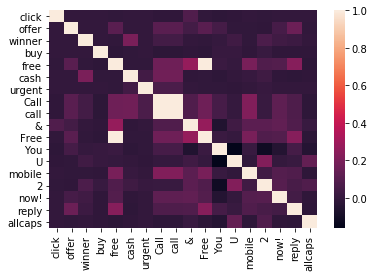

In [13]:
# check if there is very high or low corresponding between some of the features
sns.heatmap(corr_data)

In [14]:
# it seems that 'Free' and 'free' and 'Call' 'call' are repetitions of each other. So I will 
# remove one of each repetition them
data.drop(columns=['Free', 'Call'], inplace=True)

data.head()

C:\Users\padii\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,click,offer,winner,buy,free,cash,urgent,call,&,You,U,mobile,2,now!,reply,allcaps
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# use cross validation to see how well the model does
cross_val_score(bnb, data, target, cv=10)

array([0.91577061, 0.91039427, 0.92831541, 0.91397849, 0.91039427,
       0.92100539, 0.91741472, 0.91007194, 0.91546763, 0.92985612])

In [16]:
# For my third classifier I'll drop all the columns I started with
data_third = data.drop(columns=['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent'])

# use cross validation to see how well the model does
cross_val_score(bnb, data_third, target, cv=10)

array([0.88709677, 0.89605735, 0.91756272, 0.89247312, 0.90322581,
       0.90664273, 0.91561939, 0.9028777 , 0.9118705 , 0.91906475])

In [17]:
# the result from above are still okay, and very similar to what we started with.

# Next for the forth one I'll test without allcaps 
data_forth = data.drop(columns=['allcaps'])

# use cross validation to see how well the model does
cross_val_score(bnb, data_forth, target, cv=10)

array([0.91577061, 0.91039427, 0.92831541, 0.91218638, 0.91039427,
       0.92100539, 0.91561939, 0.91007194, 0.91366906, 0.92985612])

In [18]:
# Last one, keeping only the 5 which are the heighest at the most common used word
data_fifth = data.drop(columns=['offer', 'winner', 'buy', 'cash', 'urgent', 'click', 'U', 'mobile', 'now!', 
                                'reply', 'allcaps'])


cross_val_score(bnb, data_fifth, target, cv=10)

array([0.87634409, 0.89426523, 0.92114695, 0.87992832, 0.89784946,
       0.9048474 , 0.89228007, 0.89028777, 0.87589928, 0.91007194])

Above I tried to create 4 more models, by first adding a few keywords I thought will help and then changing which keywords to keep. <br> I tried to find which feature (keyword) helps the best, but I'm still not sure. It seems that all these keywords together create a decent model. The only exception would be the 'allcaps' seems not to help too much and can be cut.
<br> Below I will use confusion matrix to see which model gave the best results. 

In [19]:
y_pred_2 = bnb.fit(data, target).predict(data)

sklearn.metrics.confusion_matrix(y_pred_2, target)

array([[4753,  386],
       [  72,  361]], dtype=int64)

In [20]:
y_pred_3 = bnb.fit(data_third, target).predict(data_third)

sklearn.metrics.confusion_matrix(y_pred_3, target)

array([[4772,  465],
       [  53,  282]], dtype=int64)

In [21]:
y_pred_4 = bnb.fit(data_forth, target).predict(data_forth)

sklearn.metrics.confusion_matrix(y_pred_4, target)

array([[4750,  386],
       [  75,  361]], dtype=int64)

In [22]:
y_pred_5 = bnb.fit(data_fifth, target).predict(data_fifth)

sklearn.metrics.confusion_matrix(y_pred_5, target)

array([[4644,  406],
       [ 181,  341]], dtype=int64)

It depends what is more important to us; not to get spam email, or not to miss a real email (get it to classify as spam mistakenly).
<br> All the models do pretty bad with the false positive results, but in general, it seems like an improvement from the first model we had. 

I don't think that any of the models overfit because none of them got a very very high accuracy. <br> And it looks like either the third or forth are the best ones. 